In [ ]:
pip install pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install opendatasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import opendatasets as od
import pandas
  
od.download(
    "https://www.kaggle.com/datasets/moltean/fruits")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: ahmedseha
Your Kaggle Key: ··········


100%|██████████| 1.28G/1.28G [00:57<00:00, 24.1MB/s]


In [ ]:

import numpy as np 
import pandas as pd 
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense
from keras_preprocessing.image import  ImageDataGenerator, img_to_array, load_img
import matplotlib.pyplot as plt
from PIL import Image 
from glob import glob

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3,3), input_shape= (100, 100, 3)))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3),))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Conv2D(64, (3,3),))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(1024))
model.add(Activation("relu"))
model.add(Dropout(0.5))
model.add(Dense(131))#
model.add(Activation("softmax"))

In [ ]:
model.compile(loss = "categorical_crossentropy",
             optimizer = "adam",
             metrics = ["accuracy"])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 32)        896       
                                                                 
 activation (Activation)     (None, 98, 98, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 49, 49, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 47, 47, 32)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 23, 23, 32)       0         
 2D)                                                    

In [ ]:
train_file_path = 'fruits/fruits-360_dataset/fruits-360/Training/'
test__file_path = 'fruits/fruits-360_dataset/fruits-360/Test/'
train_datagen = ImageDataGenerator(rescale = 1./255,
                  shear_range = 0.3,
                  horizontal_flip=True,
                  vertical_flip=False,
                  zoom_range = 0.3
                  )
test_datagen  = ImageDataGenerator(rescale = 1./255)

train = train_datagen.flow_from_directory(train_file_path,
                                                    target_size=(100, 100),
                                                    batch_size = 32,
                                                    color_mode= "rgb",
                                                    class_mode = "categorical")
test = test_datagen.flow_from_directory(test__file_path,
                                                    target_size=(100, 100),
                                                    batch_size = 32,
                                                    color_mode= "rgb",
                                                    class_mode = "categorical")

Found 67692 images belonging to 131 classes.
Found 22688 images belonging to 131 classes.


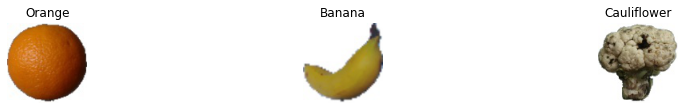

In [ ]:
images = ['Orange', 'Banana', 'Cauliflower', 'Cactus fruit', 'Eggplant', 'Avocado', 'Blueberry','Lemon', 'Kiwi']
import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure(figsize =(15,5))
for i in range(3):
    ax = fig.add_subplot(3,3,i+1,xticks=[],yticks=[])

    plt.title(images[i])
    plt.axis("off")
    ax.imshow(load_img(train_file_path + images[i] +"/0_100.jpg", target_size=(100,100)))

In [ ]:
Epocs=49
hist = model.fit(train, 
                   steps_per_epoch = 60,
                   epochs = Epocs,
                   validation_data = test
                 )

Epoch 1/49
60/60 [==============================] - 31s 321ms/step - loss: 4.7020 - accuracy: 0.0245 - val_loss: 4.2165 - val_accuracy: 0.0529
Epoch 2/49
60/60 [==============================] - 19s 322ms/step - loss: 3.9368 - accuracy: 0.0771 - val_loss: 3.1201 - val_accuracy: 0.2135
Epoch 3/49
60/60 [==============================] - 20s 341ms/step - loss: 3.1318 - accuracy: 0.1714 - val_loss: 2.5264 - val_accuracy: 0.2874
Epoch 4/49
60/60 [==============================] - 19s 318ms/step - loss: 2.6463 - accuracy: 0.2651 - val_loss: 1.9401 - val_accuracy: 0.5266
Epoch 5/49
60/60 [==============================] - 19s 313ms/step - loss: 2.1393 - accuracy: 0.3870 - val_loss: 1.6393 - val_accuracy: 0.4921
Epoch 6/49
60/60 [==============================] - 19s 320ms/step - loss: 1.8434 - accuracy: 0.4510 - val_loss: 1.2778 - val_accuracy: 0.6452
Epoch 7/49
60/60 [==============================] - 19s 322ms/step - loss: 1.4944 - accuracy: 0.5521 - val_loss: 1.0202 - val_accuracy: 0.6941

In [ ]:
from tqdm import tqdm
X_test, y_test = next(test)
for i in tqdm(range(int(len(test)/32)-1)): #1st batch is already fetched before the for loop.
  img, label = next(test)
  X_test = np.append(X_test, img, axis=0 )
  y_test = np.append(y_test, label, axis=0)
print(X_test.shape, y_test.shape)

100%|██████████| 21/21 [00:00<00:00, 34.83it/s]

(704, 100, 100, 3) (704, 131)


22/22 [==============================] - 0s 5ms/step


Text(0.5, 256.19999999999993, 'Predicted')

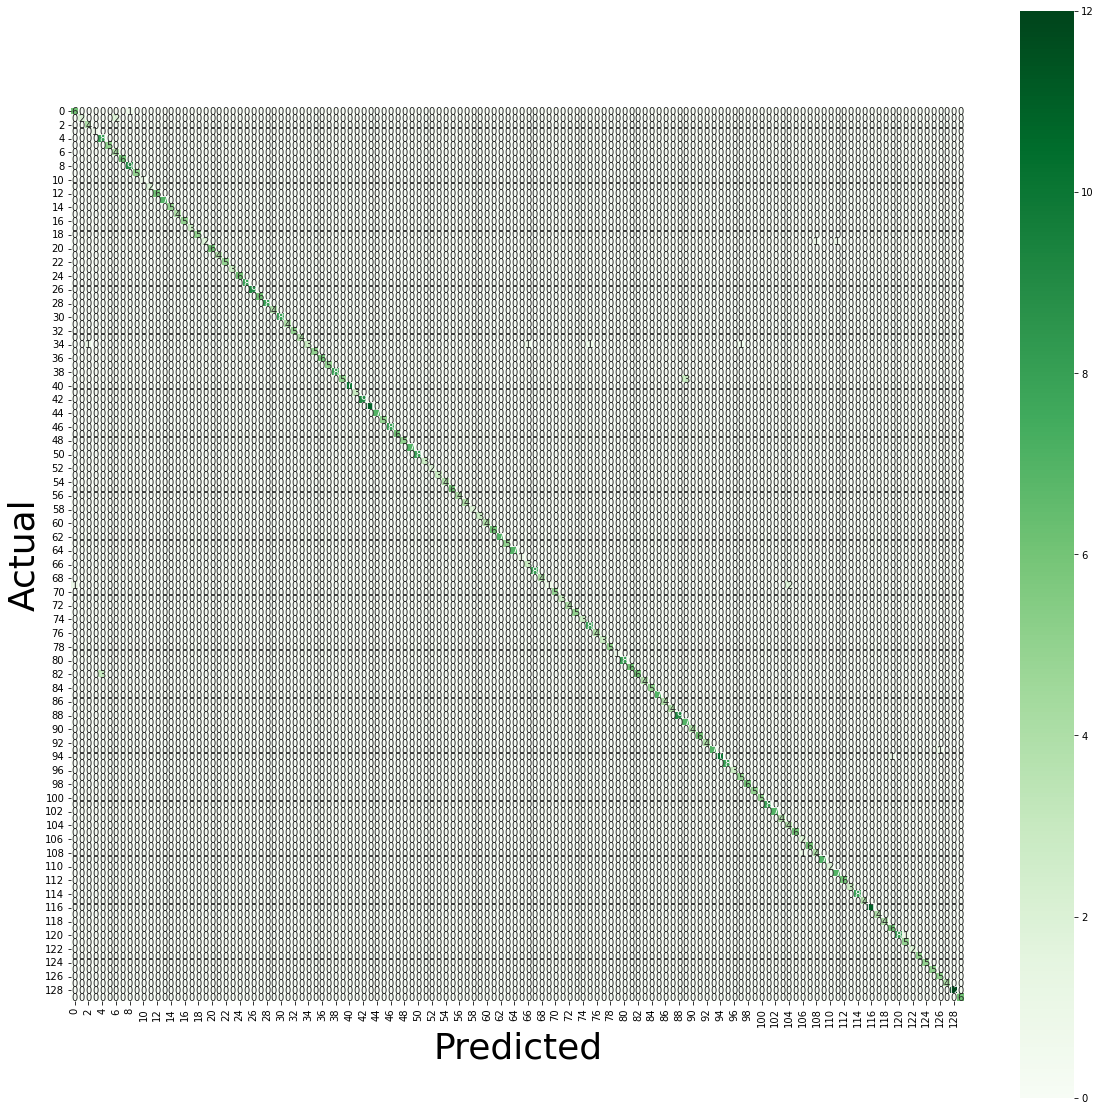

In [ ]:
from sklearn.metrics import confusion_matrix, f1_score

import seaborn as sns

y_pred = model.predict(X_test)

y_pred = np.argmax(y_pred, axis=1)

y_true = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(20, 20))

ax = sns.heatmap(cm, cmap=plt.cm.Greens, annot=True, square=True)

ax.set_ylabel('Actual', fontsize = 36)

ax.set_xlabel('Predicted', fontsize = 36)

In [ ]:
print("[INFO] Calculating model accuracy")
print( hist.history["val_accuracy"][Epocs-1]*100)

[INFO] Calculating model accuracy
96.00229263305664


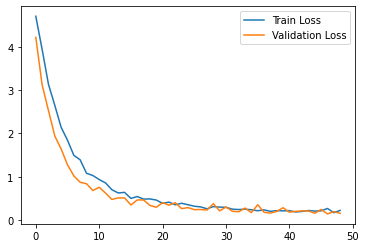

In [ ]:
plt.plot(hist.history["loss"], label = "Train Loss")
plt.plot(hist.history["val_loss"], label = "Validation Loss")
plt.legend()
plt.show()

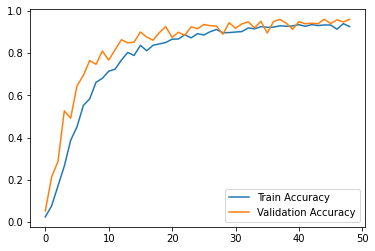

In [ ]:
plt.plot(hist.history["accuracy"], label = "Train Accuracy")
plt.plot(hist.history["val_accuracy"], label = "Validation Accuracy")
plt.legend()
plt.show()